In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings, os
warnings.filterwarnings("ignore")

from copy import copy
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc


import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from aggmap import AggMap, AggMapNet, loadmap

from aggmap import show
np.random.seed(666) #just for reaptable results



def prc_auc_score(y_true, y_score):
    precision, recall, threshold  = precision_recall_curve(y_true, y_score) #PRC_AUC
    auc = calculate_auc(recall, precision)
    return auc


def score(dfr):
    y_true = dfr.y_true
    y_score = dfr.y_score
    y_pred = dfr.y_score.round()

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    acc = (tp + tn) / sum([tn, fp, fn, tp])
    auc = roc_auc_score(y_true, y_score)

    print('acc: %.3f, roc-auc: %.3f' % (acc,auc))

    return acc, auc


    
def plot_imp(stage, i, dfi, model_dir):
    sns.set(style='white',  font='sans-serif', font_scale=2)
    fig, ax  = plt.subplots(1, 1, figsize=(10, 9))
    
    fold = 'fold_%s' % i
    
    impname = '%s_importance' % stage
    
    dfi.loc[dfi['v']==0, [impname]] = 0
    IMPM = dfi[impname].values.reshape(*mp.fmap_shape)
    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, xticklabels=10, ax =ax,
                yticklabels=10, vmin = 0.2,
                cbar_kws = {'fraction':0.046, 'pad':0.02})

    plt.title(fold)

    plt.subplots_adjust(wspace = 0.18)

    plt.savefig('./%s/%s.svg' % (model_dir, fold), dpi = 400, bbox_inches="tight")

In [4]:
from fmp import CalcFeatImp

data = pd.read_csv('./data/dfx.csv', index_col = 0)
label = pd.read_csv('./data/dfy.csv', index_col = 0)

mp = loadmap('./CRC_stage.mp')

In [3]:
label.groupby('Group').size()

Group
Healthy         127
MP               40
Stage_0          27
Stage_III_IV     54
Stage_I_II       69
dtype: int64

## Model: Healthy vs. MP:

In [4]:
stage = 'MP'
model_dir = './%s_model' % stage
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    
sld = label[label.Group.isin(['Healthy', stage])].index
dfy = label.loc[sld][['Group']]
dfx = data.loc[sld]
dfx = np.log(dfx + 1e-8)
dfy.shape, dfx.shape

((167, 1), (167, 7278))

In [5]:
X = mp.batch_transform(dfx.values, scale_method = 'standard') # NaN values should be the lowest value
Y = pd.get_dummies(dfy['Group']).values

100%|##########| 167/167 [00:27<00:00,  6.17it/s]


In [6]:
dfy.shape, dfx.shape

((167, 1), (167, 7278))

In [7]:
class_ = pd.get_dummies(dfy['Group']).columns
class_

Index(['Healthy', 'MP'], dtype='object')

################################################## 8 ##################################################

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.885
2021-02-05 19:43:28,629 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 19:43:28,804 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 3/7310 [00:00<04:30, 26.96it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [15:08<00:00,  8.04it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.765, roc-auc: 0.942
2021-02-05 19:59:04,874 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 19:59:05,017 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [16:08<00:00,  7.55it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.962
2021-02-05 20:15:39,609 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 20:15:39,725 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [15:46<00:00,  7.73it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.941, roc-auc: 0.904
2021-02-05 20:31:52,078 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 20:31:52,204 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [14:43<00:00,  8.27it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.750
2021-02-05 20:47:03,031 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 20:47:03,241 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [16:15<00:00,  7.49it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.750
2021-02-05 21:03:52,595 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 21:03:52,742 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 4/7310 [00:00<04:44, 25.65it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [17:25<00:00,  6.99it/s]



 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.824, roc-auc: 0.827
2021-02-05 21:21:43,875 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 21:21:44,025 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [16:09<00:00,  7.54it/s]



 input train and test X shape is (151, 86, 85, 5), (16, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.875, roc-auc: 0.896
2021-02-05 21:38:22,512 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 21:38:22,717 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [17:51<00:00,  6.82it/s] 



 input train and test X shape is (151, 86, 85, 5), (16, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.812, roc-auc: 0.750
2021-02-05 21:56:47,578 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 21:56:47,724 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [18:54<00:00,  6.45it/s]



 input train and test X shape is (151, 86, 85, 5), (16, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.812, roc-auc: 0.771
2021-02-05 22:16:13,322 - INFO - [bidd-aggmap] - generate file: ./feature points_7278_correlation_umap_mp
2021-02-05 22:16:13,518 - INFO - [bidd-aggmap] - save html file to ./feature points_7278_correlation_umap_mp


  0%|          | 0/7310 [00:00<?, ?it/s]

calculating feature importance for MP ...


100%|##########| 7310/7310 [17:55<00:00,  6.80it/s]


################################################## 16 ##################################################

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.765, roc-auc: 0.577

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 1.000, roc-auc: 1.000

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.962

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.882, roc-auc: 0.962

 input train and test X shape is (150, 86, 85, 5), (17, 86, 85, 5) 
MultiClassEstimator(batch_size=2, conv1_kernel_size=15, epochs=15, gpuid='2')
acc: 0.765, roc-auc: 0.442

 input train and test X 

['./MP_model/feature_imp.pkl']

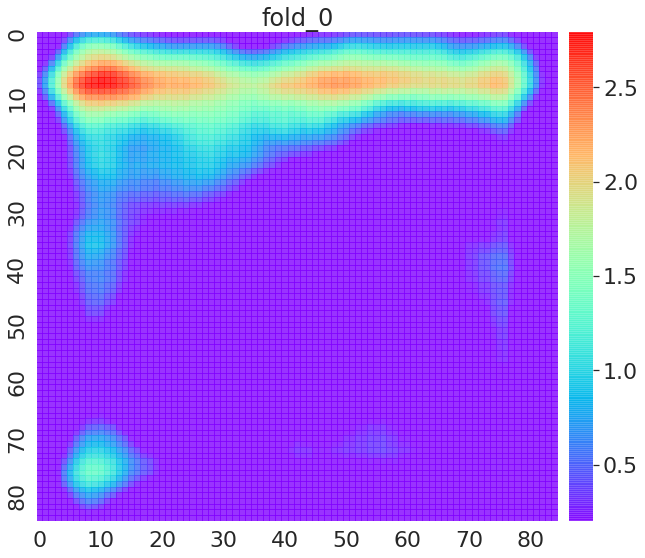

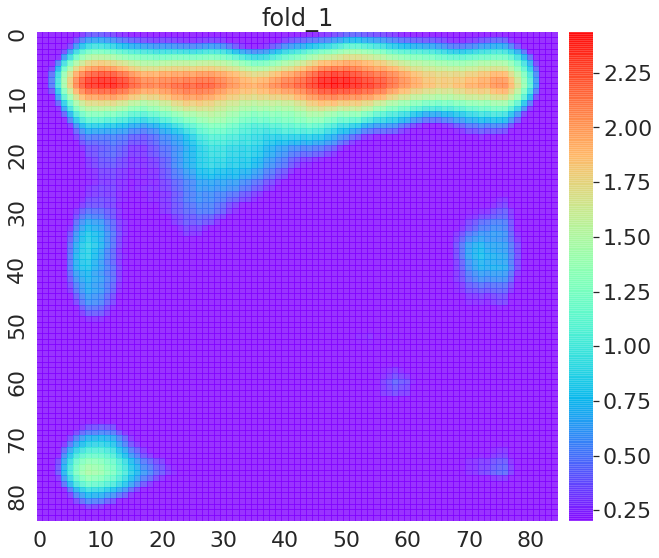

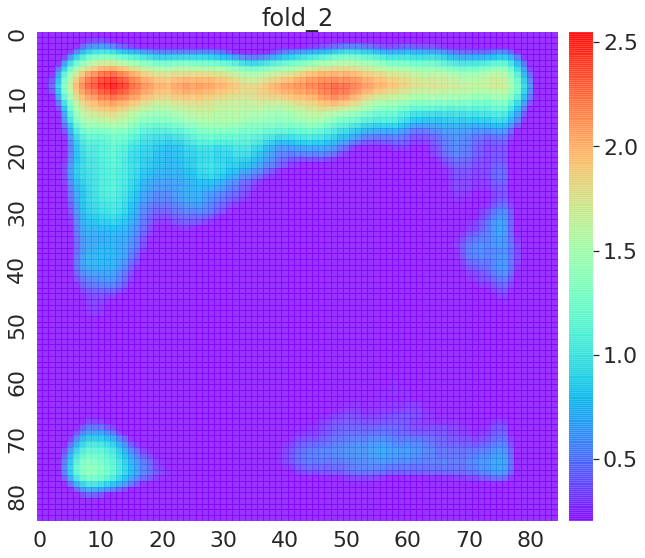

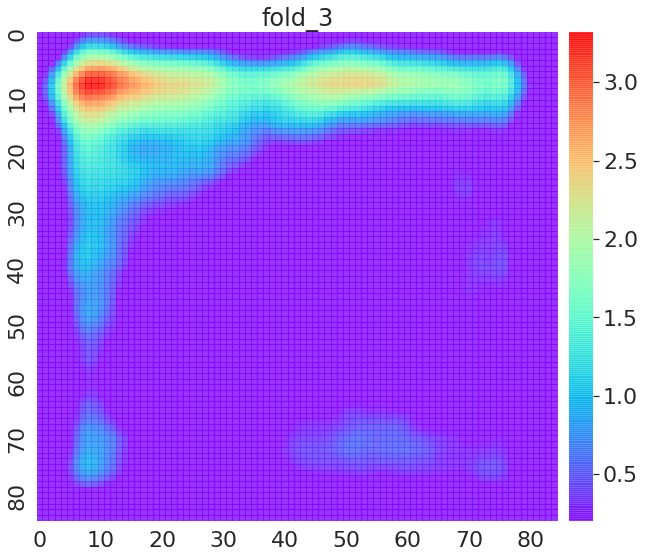

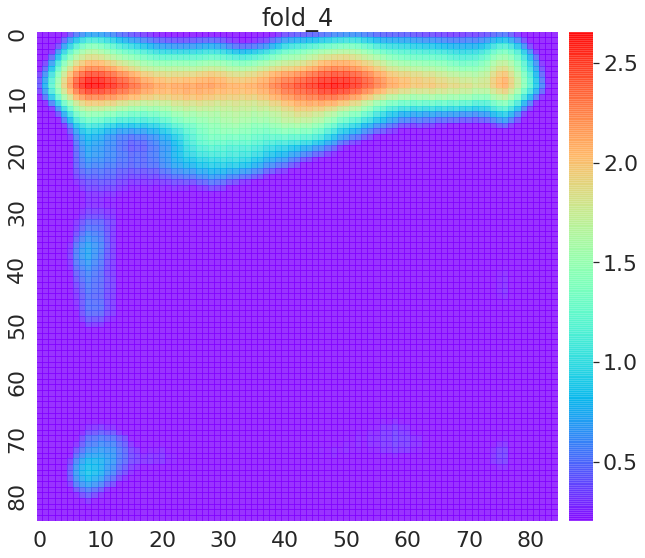

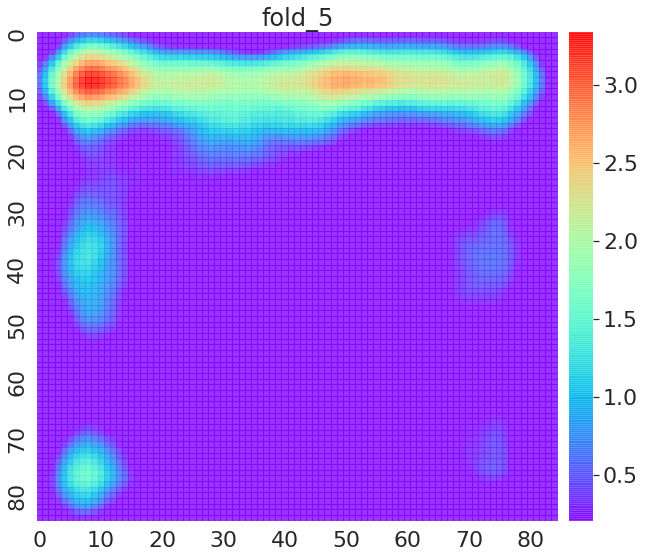

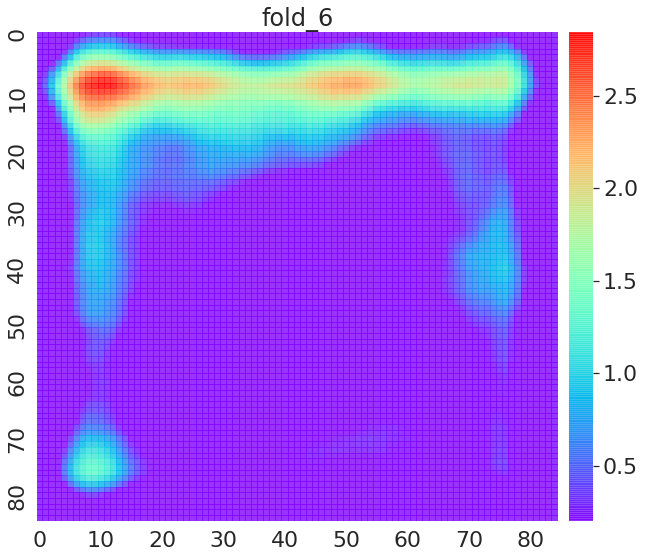

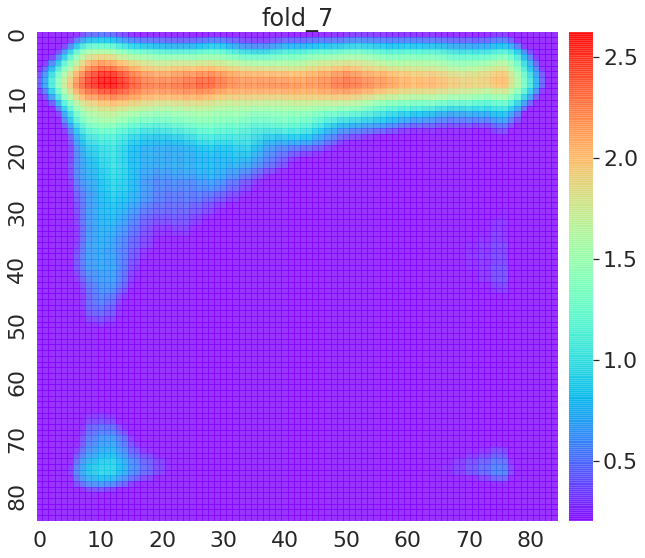

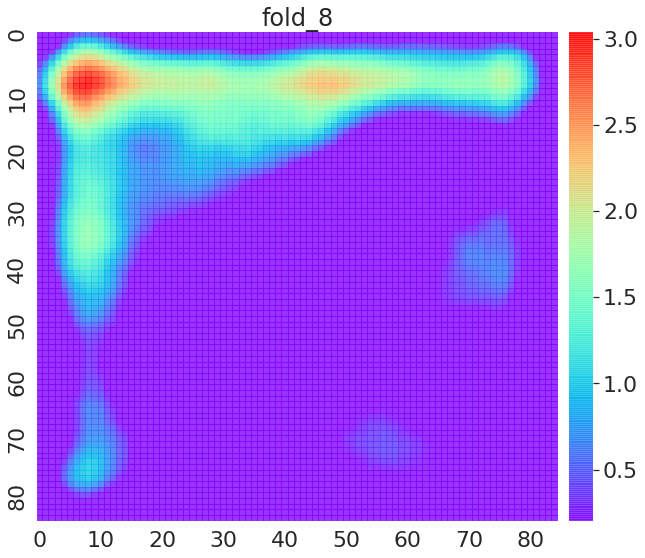

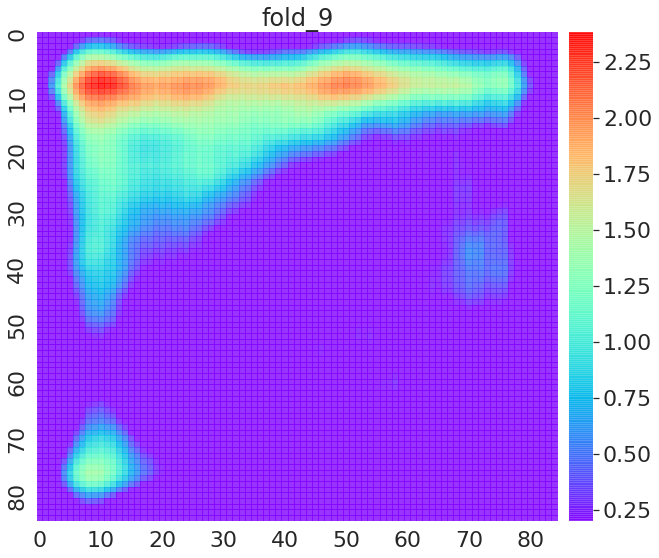

In [8]:
outer_fold = 10
repeat_seeds = [8, 16, 32, 64, 128]#5 repeats random seeds 8, 16, 32, 64, 128

each_fold_results = []
run_all_res = []
imp_res = []
for repeat_seed in repeat_seeds: 
    
    outer = StratifiedKFold(n_splits = outer_fold, shuffle = True, random_state = repeat_seed)
    outer_idx = outer.split(X, dfy.values)

    print('#'*50 + ' %s ' % repeat_seed + '#'*50 )
    run_one_res = []
    for i, idx in enumerate(outer_idx):
        
        fold_num = "fold_%s" % str(i).zfill(2) 
        
        train_idx, test_idx = idx
        
        testY = Y[test_idx]
        testX = X[test_idx]
        
        trainX = X[train_idx]
        trainY = Y[train_idx]

        print("\n input train and test X shape is %s, %s " % (trainX.shape,  testX.shape))
        
        clf = AggModel.MultiClassEstimator(epochs = 15, gpuid = 2,  conv1_kernel_size = 15,
                                           batch_size = 2, verbose = 0) #
        clf.fit(trainX, trainY) 
        y_true = testY[:,1] #Stage
        y_score = clf.predict_proba(testX)[:,1]
        
        dfr = pd.DataFrame([y_true, y_score]).T
        dfr.columns = ['y_true', 'y_score']
        dfr.index = dfy.iloc[test_idx].index
        acc, auc = score(dfr)
        run_one_res.append(dfr)
        each_fold_results.append([auc, i, repeat_seed])
        
        ## save model for interpretation
        if repeat_seed == 8:
            clf._model.save(os.path.join(model_dir, 'seed_%s_fold_%s.h5' % (repeat_seed, i)))
            model = clf._model
            arrX = trainX
            dfY = pd.DataFrame(trainY, columns = pd.get_dummies(dfy['Group']).columns)
            df_imp = CalcFeatImp(model, mp, arrX, dfY, task_type = 'classification', sigmoidy = False, )
            df_imp.to_excel(os.path.join(model_dir, 'feature_imp_%s_%s.xlsx' % (repeat_seed, i)))
            plot_imp(stage, i, df_imp, model_dir)
            imp_res.append([repeat_seed, i, df_imp])  
            
    run_all_res.append(pd.concat(run_one_res))

dump(imp_res, os.path.join(model_dir, 'feature_imp.pkl'))  

In [9]:
pd.DataFrame(each_fold_results,columns = ['ROC-AUC', 'fold', 'seed']).to_csv('./results/each_fold_performance_results_%s.csv' % stage)

In [10]:
pd.DataFrame(each_fold_results,columns = ['ROC-AUC', 'fold', 'seed']).groupby('seed').apply(np.mean)

,ROC-AUC,fold,seed
seed,,,
8,0.843590,4.5,8.0
16,0.839103,4.5,16.0
32,0.812821,4.5,32.0
64,0.816506,4.5,64.0
128,0.828205,4.5,128.0


In [11]:
pd.DataFrame(each_fold_results,columns = ['ROC-AUC', 'fold', 'seed']).groupby('seed').apply(np.mean).mean()

ROC-AUC     0.828045
fold        4.500000
seed       49.600000
dtype: float64

In [12]:
dfres = imp_res[1][-1]
for i, a in enumerate(imp_res):
    df = a[-1]
    dfres['fold_%s' % i] = df['%s_importance' % stage]
    

dfres = dfres.drop(columns=['%s_importance' % stage])
dfres['scatter_x'] = dfres['v'].map(mp.df_embedding.x.to_dict())
dfres['scatter_y'] = dfres['v'].map(mp.df_embedding.y.to_dict())
dfres = dfres.rename(columns = {'x':'grid_x', 'y':'grid_y', 'v': 'feature_points'})
dfres = dfres[['feature_points', 'grid_x', 'grid_y','scatter_x', 'scatter_y', 'Subtypes', 'colors', 'fold_0',
       'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7','fold_8', 'fold_9', ]]
dfres = dfres.set_index('feature_points')
dfres["%s_avg_imp" % stage] = dfres[dfres.columns[-10:]].mean(axis=1)
#dfres = dfres.sort_values("%s_avg_imp" % stage, ascending=False)
dfres.to_excel('./results/%s_importance.xlsx' % stage)

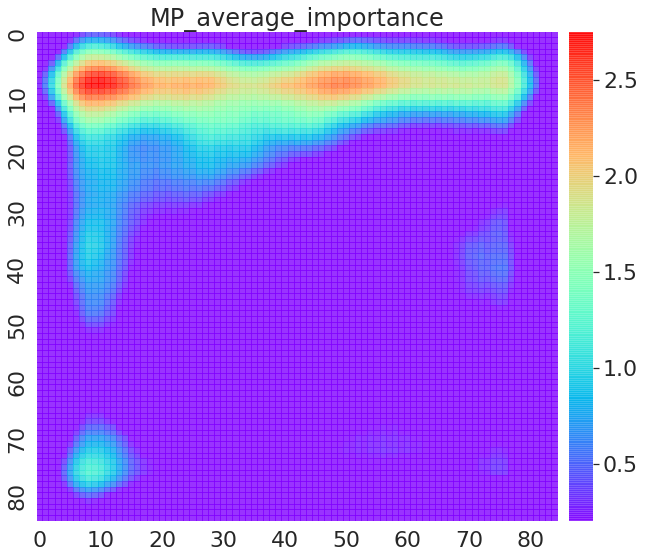

In [13]:
sns.set(style='white',  font='sans-serif', font_scale=2)
fig, ax  = plt.subplots(1, 1, figsize=(10, 9))

IMPM = dfres["%s_avg_imp" % stage] .values.reshape(*mp.fmap_shape)
sns.heatmap(IMPM,  
            cmap = 'rainbow', alpha = 0.8, xticklabels=10, ax =ax,
            yticklabels=10, vmin = 0.2,
            cbar_kws = {'fraction':0.046, 'pad':0.02})

plt.title("%s_average_importance" % stage)

plt.subplots_adjust(wspace = 0.18)

plt.savefig("./results/%s_average_importance.svg" % stage, dpi = 400, bbox_inches="tight")